<a href="https://colab.research.google.com/github/soyab266/ML-Roadmap-for-2022/blob/main/titanic_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/titanic.csv')

In [7]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

In [10]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
column_to_drop = ['PassengerId','Name', 'Ticket', 'Cabin']

In [12]:
def clean_data(df):
  return(
      df

      .drop(columns=column_to_drop)
      .assign( family= lambda df_ : df_ ['SibSp'] + df_['Parch'])
      .drop(columns=['SibSp','Parch'])
      .rename(columns=str.lower)

  )


In [13]:
df1=clean_data(df)

In [14]:
df1.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2
family,0


In [15]:
df1['survived'].value_counts()

,count
survived,
0,549
1,342


In [16]:
df1.loc[:,'survived'].value_counts(
    normalize=True
)

,proportion
survived,
0,0.616162
1,0.383838


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_boxplot(data,column_name):
  sns.boxplot(data=data,y=column_name)
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


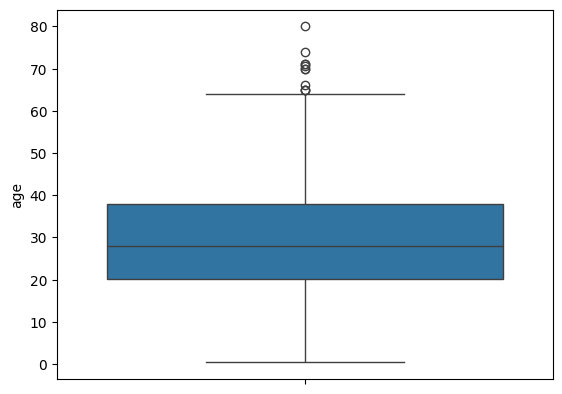

In [18]:
create_boxplot(data=df1,column_name='age')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


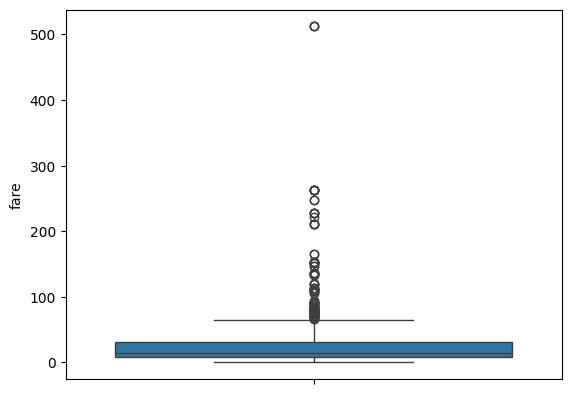

In [19]:
create_boxplot(data=df1,column_name='fare')

In [20]:
def plot_distribution(data,column_name):
  sns.countplot(data=data,x=column_name)
  plt.show()

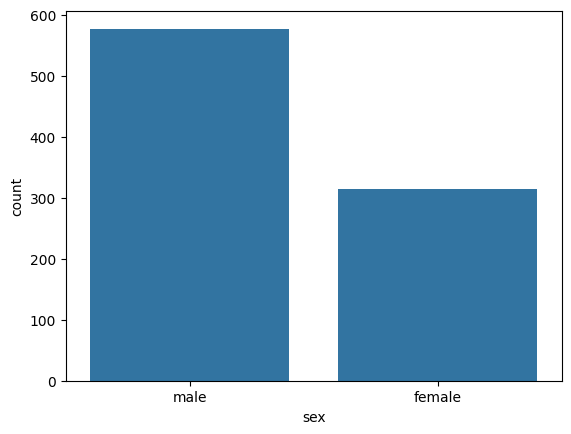

In [21]:
plot_distribution(data=df1,column_name='sex')

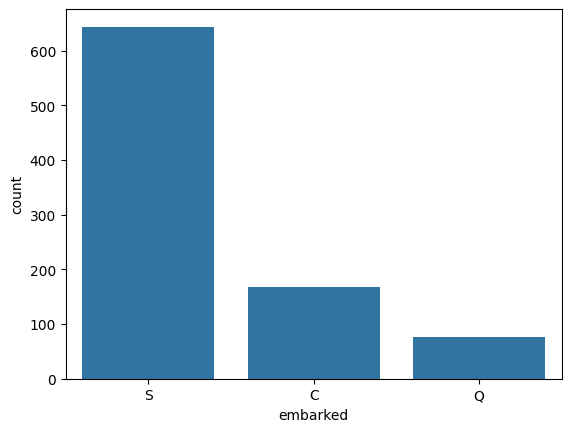

In [22]:
plot_distribution(data=df1,column_name='embarked')

In [23]:
x=df1.drop(columns=['survived'])
y=df1.loc[:,'survived']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(712, 6)

In [26]:
y_train.shape

(712,)

In [27]:
df1['age'].isnull().sum()

177

In [28]:
!pip install feature-engine
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

In [29]:
age_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outliers', Winsorizer(capping_method= 'gaussian',fold=3)),
    ('scaler', StandardScaler())

])

age_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('outliers', Winsorizer(fold=3)),
                ('scaler', StandardScaler())])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='age'>

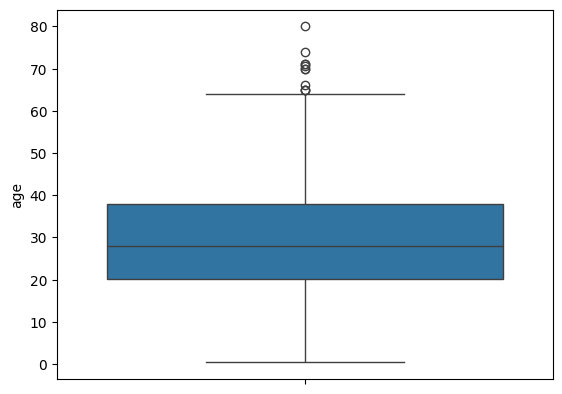

In [30]:
sns.boxplot( data=df1,y='age')

In [31]:
fare_pipe = Pipeline(steps= [
    ('outliers' ,Winsorizer(capping_method='iqr',fold=1.5)),
    ('scaler',StandardScaler())
])
fare_pipe

Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', fold=1.5)),
                ('scaler', StandardScaler())])

In [35]:
!pip install category-encoders --upgrade #upgrade category_encoders to latest version
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#Try importing CountFrequencyEncoder after upgrading
try:
  from category_encoders import CountFrequencyEncoder
except ImportError:
  #If it fails, let's try importing it from feature_engine
  from feature_engine.encoding import CountFrequencyEncoder
  print("Imported CountFrequencyEncoder from feature_engine instead.")
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Imported CountFrequencyEncoder from feature_engine instead.


In [39]:
embarked_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('count_encode',CountFrequencyEncoder(encoding_method='count')),
    ('scaler',MinMaxScaler())
])
embarked_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('count_encode', CountFrequencyEncoder()),
                ('scaler', MinMaxScaler())])

In [47]:
from sklearn import set_config # Import the set_config function from sklearn

set_config(transform_output='pandas')

from sklearn.preprocessing import OneHotEncoder

In [49]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers= [
    ('age',age_pipe,['age']),
    ('fare',fare_pipe,['fare']),
    ('embarked',embarked_pipe,['embarked']),
    ('sex', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['sex']),
    ('family',MinMaxScaler(),['family'])

],remainder='passthrough', n_jobs=-1,force_int_remainder_cols=False)
preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scaler', StandardScaler())]),
                                 ['age']),
                                ('fare',
                                 Pipeline(steps=[('outliers',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('scaler', StandardScaler())]),
                                 ['fare']),
                                ('embarked',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('count_encode',
                                                  CountFrequencyEncoder()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['embarked']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sex']),
                                ('family', MinMaxScaler(), ['family'])])

In [50]:
preprocessor.fit_transform(x_train)

,age__age,fare__fare,embarked__embarked,sex__sex_female,sex__sex_male,family__family,remainder__pclass
331,1.244584,0.236751,1.0,0.0,1.0,0.0,1
733,-0.502078,-0.532339,1.0,0.0,1.0,0.0,2
382,0.196587,-0.784153,1.0,0.0,1.0,0.0,3
704,-0.269190,-0.787666,1.0,0.0,1.0,0.1,3
813,-1.821779,0.374443,1.0,1.0,0.0,0.6,3
...,...,...,...,...,...,...,...
106,-0.657337,-0.797799,1.0,1.0,0.0,0.0,3
270,0.002424,0.360798,1.0,0.0,1.0,0.0,1
860,0.895252,-0.477346,1.0,0.0,1.0,0.2,3
435,-1.200743,2.016201,1.0,1.0,0.0,0.3,1


In [52]:
preprocessor.get_params()

{'force_int_remainder_cols': False,
 'n_jobs': -1,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age',
   Pipeline(steps=[('imputer', SimpleImputer()), ('outliers', Winsorizer(fold=3)),
                   ('scaler', StandardScaler())]),
   ['age']),
  ('fare',
   Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', fold=1.5)),
                   ('scaler', StandardScaler())]),
   ['fare']),
  ('embarked',
   Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                   ('count_encode', CountFrequencyEncoder()),
                   ('scaler', MinMaxScaler())]),
   ['embarked']),
  ('sex',
   OneHotEncoder(handle_unknown='ignore', sparse_output=False),
   ['sex']),
  ('family', MinMaxScaler(), ['family'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': Pipeline(steps=[('imputer', SimpleImputer()), ('outliers', Winsorizer(fold=3)),
                 ('scaler', StandardScaler())]),

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_param= {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [57]:
model_pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(**model_param))
])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('model', RandomForestClassifier(n_estimators=300))])

In [58]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('model', RandomForestClassifier(n_estimators=300))])

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [73]:
y_pred=model_pipe.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [74]:
metrics={
    'accuracy':accuracy,
    'precision':precision,
    'recall':recall,
    'f1':f1
}

metrics

{'accuracy': 0.8212290502793296,
 'precision': 0.7916666666666666,
 'recall': 0.7702702702702703,
 'f1': 0.7808219178082192}

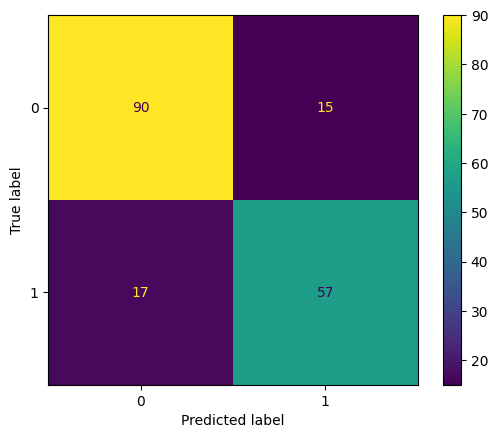

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#cm=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)